In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import pickle

In [3]:
nba_data = pd.read_csv('CSV_files/cleaned_nba_data.csv', index_col = 0)

In [5]:
nba_data.columns

Index(['3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'TEAM', 'AGE',
       'W', 'SOS', 'PACE', '3PAr', 'TS%', 'TOV%', 'ORB%', 'FT/FGA', 'D_eFG%',
       'D_TOV%', 'DRB%', 'D_FT/FGA', 'SEASON'],
      dtype='object')

Applying all the interactions that were found to be the best from the multiple models

In [7]:
nba_data['TS_Ast'] = [nba_data['TS%'][i]*nba_data['AST'][i] for i in range(len(nba_data['TS%']))]

In [8]:
nba_data['TS_ORB'] = [nba_data['TS%'][i]*nba_data['ORB%'][i] for i in range(len(nba_data['TS%']))]

In [9]:
nba_data['TS_Pts'] = [nba_data['TS%'][i]*nba_data['PTS'][i] for i in range(len(nba_data['TS%']))]

### Creating Target and Features

In [10]:
X = nba_data['W']
y = nba_data.drop(columns = ['W', 'TEAM', 'SEASON'])

### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23,test_size=0.2)  

### Lasso Test 

#### Turned out to be the best type of model after comparing results in multiple scenarios

In [13]:
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso()

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))

print('Testing Error: '+ str(test_rmse))

ValueError: Expected 2D array, got 1D array instead:
array=[20. 48. 30. 29. 23. 57. 43. 48. 33. 45. 37. 22. 56. 40. 22. 49. 50. 32.
 19. 39. 43. 23. 60. 24. 29. 22. 21. 52. 37. 33. 36. 48. 31. 32. 47. 36.
 26. 49. 51. 20. 41. 25. 62. 43. 39. 27. 43. 62. 57. 17. 34. 40. 51. 23.
 25. 47. 47. 41. 59. 51. 36. 38. 39. 43. 17. 24. 48. 25. 38. 21. 37. 45.
 41. 41. 18. 56. 41. 55. 40. 35. 57. 58. 58. 56. 48. 19. 32. 19. 33. 57.
 23. 21. 50. 31. 50. 53. 27. 56. 51. 67. 44. 42. 53. 29. 44. 46. 25. 32.
 46. 28. 37. 28. 26. 45. 44. 34. 10. 53. 49. 41. 43. 48. 27. 21. 50. 42.
 34. 22. 54. 42. 49. 20. 48. 51. 27. 24. 29. 49. 56. 33. 40. 41. 44. 48.
 15. 44. 54. 40. 34. 29. 27. 19. 38. 41. 42. 39. 29. 51. 55. 73. 39. 46.
 51. 45. 50. 32. 41. 20. 52. 39. 44. 46.  7. 36. 53. 46. 28. 19. 33. 37.
 36. 22. 17. 48. 34. 37. 29. 40. 30. 35. 55. 41. 50. 58. 41. 47. 31. 42.
 40. 59. 49. 67. 42. 21. 24. 47. 29. 30. 50. 55. 38. 35. 54. 53. 61. 45.
 33. 28. 36.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Viewing Lasso data as a graph

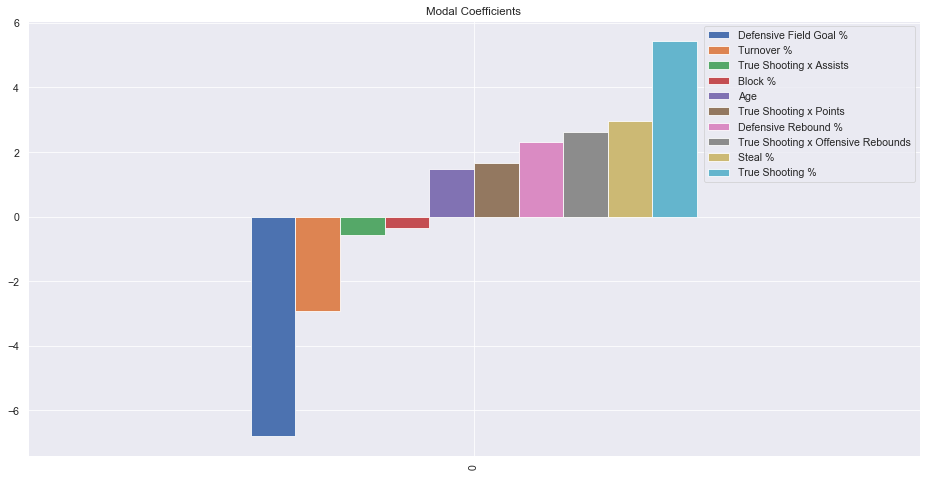

In [51]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [52]:
lasso_coef01.T

,0
Defensive Field Goal %,-6.792426
Turnover %,-2.918656
True Shooting x Assists,-0.557037
Block %,-0.345137
Age,1.485445
True Shooting x Points,1.650155
Defensive Rebound %,2.305082
True Shooting x Offensive Rebounds,2.611391
Steal %,2.966013
True Shooting %,5.455595


In [53]:
import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)


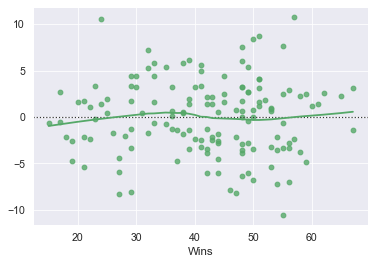

In [54]:
sns.residplot(y_train, y_train_pred_lasso,lowess=True, color="g")

Final Check of Collinearity of the Data

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(5)

,VIF Factor,features
0,1.62581,Age
1,1.38400,Turnover %
2,1.34919,Defensive Field Goal %
3,1.48854,Defensive Rebound %
4,3.27342,True Shooting %
5,1.43523,Steal %
6,1.25401,Block %
7,1.51775,True Shooting x Assists
8,1.36847,True Shooting x Offensive Rebounds
9,2.65602,True Shooting x Points


Checking *R^2* Value

In [26]:
X_endog = sm.add_constant(X_test)

In [27]:
res = sm.OLS(list(y_test), X_endog)

In [28]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     26.83
Date:                Thu, 07 May 2020   Prob (F-statistic):           5.89e-11
Time:                        17:37:04   Log-Likelihood:                -103.48
No. Observations:                  36   AIC:                             227.0
Df Residuals:                      26   BIC:                             242.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 41.5133      0.966     42.982      0.000      39.528      43.499
Age                                    0.3714      1.532      0.242      0.810      -2.778       3.520
Turnover %                            -4.7889      1.355     -3.534      0.002      -7.574      -2.003
Defensive Field Goal %               -11.7955      1.568     -7.523      0.000     -15.018      -8.573
True Shooting %                        4.5789      1.618      2.830      0.009       1.253       7.905
Steal %                                1.8934      0.918      2.062      0.049       0.006       3.781
Block %                               -2.1825      0.860     -2.538      0.018      -3.951      -0.415
True Shooting x Assists                0.6418      1.118      0.574      0.571      -1.657       2.941
True Shooting x Offensive Rebounds     1.6884      0.909      1.857      0.075      -0.180       3.557
True Shooting x Points                 2.0667      1.360      1.520      0.141      -0.728       4.861
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.023
Skew:                           0.055   Prob(JB):                        0.988
Kurtosis:                       3.058   Cond. No.                         4.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [58]:
X = nba_data[features_list]
y = nba_data['Wins']
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(lasso, X, y, scoring='r2', cv=crossvalidation))
baseline

0.8341412117399747

In [59]:
X_train.describe()

,Age,Turnover %,Defensive Field Goal %,Defensive Rebound %,True Shooting %,Steal %,Block %,True Shooting x Assists,True Shooting x Offensive Rebounds,True Shooting x Points
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,-3.083953e-18,1.412450e-15,-6.662880e-15,7.377972e-15,-1.630640e-15,1.105597e-15,7.201030e-16,4.841806e-16,-6.603514e-16,4.132497e-16
std,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00
min,-2.030664e+00,-2.335107e+00,-2.707249e+00,-2.604408e+00,-2.647401e+00,-2.268549e+00,-2.495899e+00,-2.053273e+00,-2.272389e+00,-1.996727e+00
25%,-6.352709e-01,-7.062586e-01,-7.210648e-01,-6.405518e-01,-6.250326e-01,-7.686433e-01,-7.683150e-01,-6.720118e-01,-7.397057e-01,-7.034396e-01
50%,-1.505555e-01,-4.453883e-02,-5.900317e-02,-1.063584e-02,-2.177685e-02,2.336302e-03,4.149001e-02,-9.265129e-02,2.236141e-02,-2.493630e-02
75%,5.691734e-01,7.444348e-01,7.271950e-01,6.563340e-01,6.691768e-01,7.592981e-01,7.523188e-01,5.835844e-01,7.537462e-01,6.475311e-01
max,2.317086e+00,3.060454e+00,3.030618e+00,2.434920e+00,2.269000e+00,2.665721e+00,2.470905e+00,3.222387e+00,3.275019e+00,3.362579e+00


In [60]:
nba_data.describe()

,Age,Wins,Turnover %,Defensive Field Goal %,Defensive Rebound %,True Shooting %,Steal %,Block %,year,True Shooting x Assists,True Shooting x Offensive Rebounds,True Shooting x Points
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,26.539444,41.000000,13.021667,0.509800,76.163889,0.547434,15.782222,16.495556,2016.500000,78.974291,13.025222,61.695023
std,1.726607,12.469852,0.976385,0.018087,2.019120,0.018722,1.845065,2.900276,1.712589,8.272053,1.290170,5.466285
min,23.200000,10.000000,10.700000,0.460000,71.000000,0.497700,11.800000,9.500000,2014.000000,61.929780,9.849400,51.085760
25%,25.375000,32.000000,12.300000,0.496000,74.850000,0.534450,14.375000,14.300000,2015.000000,73.152992,12.113257,57.908120
50%,26.300000,42.000000,12.950000,0.511000,76.200000,0.547150,15.750000,16.600000,2016.500000,78.416740,13.099440,61.030715
75%,27.600000,50.000000,13.725000,0.522250,77.500000,0.559925,17.100000,18.525000,2018.000000,84.590530,13.933208,65.259555
max,30.600000,73.000000,16.000000,0.564000,81.200000,0.590200,20.600000,26.800000,2019.000000,104.980150,17.254280,81.551580


The final model included 9 features the 4 most valuable, according to the Lasso model were, DFG%, TS_Pts and TOVs. 

DFG% was the most effective tool, this is the shooting % of the other team, and it had a large affect on the data which makes sense, and goes with my original idea that defense should a big proponent in wins

TS also made sense. As they show the efficiency of scoring with TS. The volume of scoring itself did not have as much of an impact in the end as the rest

TOV is a measure of possessions. This is negatively correlated as expected as less turnovers means you have the ball more. This goes with DFG% as if you have a higher rate of turnovers and more possessions it will lead to the most efficiency. 

*Honorable mention to Age which had a high correlation and i believe this is due to the trend of tanking in the nba which has become much more prevelant in the last decade where more teams will completely rebuild their rosters from the ground up and go all in on youth to lose more on purpose.* 
 

Overall the model was very effective. From the final results of an R^2 of .902 i was able to find the proper balance between overfitting and underfitting the model using the most valuable stats. 

What i learned is that efficiency was key when creating features in the data. So in terms of basketball for offense its more about finding quality shots rather than more shots. and for defense hindering the opponents quality looks is better than something like blocks, steals or rebounds.

Possesion also matters, maintaining low turnovers had a very positive affect on teams wins in the model.

Things that didnt matter as much were rebounding as a whole, surprisingly 3 pt shooting didnt mean much either, at least the quantity. This may be due to the data we have being during the 3 point shooting era as even though the numbers have increased year upon year the overall numbers are still pretty close compared to where they were even 10 years ago. 